<a href="https://colab.research.google.com/github/meghadas123/Introduction-to-Cosmology_Project/blob/main/Cosmology_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PHY443  Introduction to Cosmology**

**Measuring Cosmological Parameters**


**Specify the location and load the given survey of Type 1a supernovae (SNe) catalogue data**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Specify the url path to the data file in GitHub
SNe_catalogue_url = "https://raw.githubusercontent.com/meghadas123/Introduction-to-Cosmology_Project/main/SNe_Das.csv"

**Each catalogue contains three columns: Redshift, Peak apparent magnitude of the supernovae, and Uncertainties on the peak apparent magnitudes. First task is to plot apparent magnitude against redshift for all the SNe**

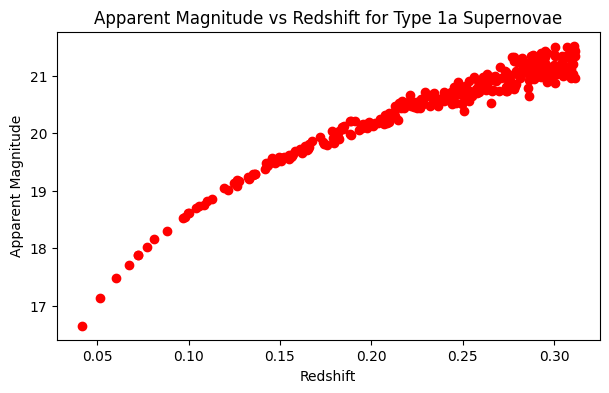

In [ ]:
# Read the catalogue file into a pandas DataFrame
SNe_data = pd.read_csv(SNe_catalogue_url)

# Extract redshift and apparent magnitude columns from the data provided
redshift = SNe_data['Redshift']
apparent_magnitude = SNe_data['AppMag']

# Plot apparent magnitude against redshift
plt.figure(figsize=(7, 4))
plt.scatter(redshift, apparent_magnitude, color='red', marker='o')
plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.title('Apparent Magnitude vs Redshift for Type 1a Supernovae')
plt.show()

**To determine the luminosity distance (in Mpc) to the SNe with the lowest redshift, need to employ the formula relating apparent and absolute magnitudes, as well as the luminosity distance. The formula is expressed as: M = m - 5 * log10(dL) + 5. Here, M represents the absolute magnitude, m signifies the apparent magnitude, and dL denotes the luminosity distance in parsecs.**

In [ ]:
import numpy as np
# Constants
M = -19.5  # Peak absolute magnitude of Type 1a supernovae

# The apparent magnitude and redshift of the lowest redshift supernova
lowest_redshift_index = np.argmin(redshift)
apparent_mag_lowest = apparent_magnitude[lowest_redshift_index]

# To calculate luminosity distance in parsecs
dL_lowest_parsecs = 10**((apparent_mag_lowest - M + 5) / 5)

# Convert to Mpc
dL_lowest_Mpc = dL_lowest_parsecs / 1e6

print(f"Luminosity distance to the lowest redshift Type 1a supernova: {dL_lowest_Mpc} Mpc")

Luminosity distance to the lowest redshift Type 1a supernova: 170.23152902072033 Mpc


**Now, need to use the lowest redshift SNe to obtain an initial estimate for H0, formula to be used is dL=dp(proper dist)*(1+z)=[c*z*(1+z)]/Ho**

In [ ]:
# Constants
c = 3.0e5  # Speed of light in Km/s

# Get the redshift of the lowest redshift supernova
redshift_lowest = redshift[lowest_redshift_index]

# Calculate H0,I
H0_I = [c * redshift_lowest * (1 + redshift_lowest)] / dL_lowest_Mpc

print(f"Initial estimate for H0 (H0,I) using the lowest redshift Type 1a supernova: {H0_I} km/s/Mpc")

Initial estimate for H0 (H0,I) using the lowest redshift Type 1a supernova: [76.17081909] km/s/Mpc


**Next, calculate the luminosity distances (in Mpc) to every SNe, using only
 their apparent and absloute magnitudes (using the same formula as before M = m - 5 * log10(dL) + 5)**

In [ ]:
# Calculate luminosity distances to every supernova
dL_all_Mpc = []
for i in range(len(redshift)):
    apparent_mag = apparent_magnitude[i]
    dL = 10**((apparent_mag - M + 5) / 5)
    dL_Mpc = dL / 1e6  # Convert to Mpc
    dL_all_Mpc.append(dL_Mpc)

# Print the calculated luminosity distances
for i, dL_Mpc in enumerate(dL_all_Mpc):
    print(f"Luminosity distance to Type 1a supernova {i+1}: {dL_Mpc} Mpc")

Luminosity distance to Type 1a supernova 1: 1087.8775136187935 Mpc
Luminosity distance to Type 1a supernova 2: 953.1033587290824 Mpc
Luminosity distance to Type 1a supernova 3: 848.0862069189342 Mpc
Luminosity distance to Type 1a supernova 4: 1356.500630633499 Mpc
Luminosity distance to Type 1a supernova 5: 532.672161144445 Mpc
Luminosity distance to Type 1a supernova 6: 974.406113287256 Mpc
Luminosity distance to Type 1a supernova 7: 435.5921053268024 Mpc
Luminosity distance to Type 1a supernova 8: 1069.6950841953771 Mpc
Luminosity distance to Type 1a supernova 9: 532.0592525418468 Mpc
Luminosity distance to Type 1a supernova 10: 1038.6279368489454 Mpc
Luminosity distance to Type 1a supernova 11: 1136.8940667943937 Mpc
Luminosity distance to Type 1a supernova 12: 1261.5951187759251 Mpc
Luminosity distance to Type 1a supernova 13: 1097.0337784084331 Mpc
Luminosity distance to Type 1a supernova 14: 575.5194427943694 Mpc
Luminosity distance to Type 1a supernova 15: 687.4798918867667 Mpc


**Next, need to evaluate the luminosity distance to redshift z = zmax, where zmax is the redshift of the highest redshift SN in the catalogue, assuming a cosmological model where Ω_M,0 = 0.5, Ω_D,0 = 0.5
 and H0 =H0_I. NOTE: The FlatLambdaCDM class in astropy.cosmology assumes a flat universe by default, meaning that the sum of the energy density parameters for matter and dark energy is constrained to be 1.**

In [ ]:
from astropy.cosmology import FlatLambdaCDM

# Constants
Omega_M_0 = 0.5
Omega_Lambda_0 = 0.5
H0_I = 76.17081909  # Assuming H0_I is the initial estimate for H0

# Find the maximum redshift value in the column
z_max = np.max(redshift)

# Create a FlatLambdaCDM cosmology instance
cosmo = FlatLambdaCDM(H0=H0_I, Om0=Omega_M_0)

# Calculate the luminosity distance to redshift z_max
d_L = cosmo.luminosity_distance(z_max).value  # in Mpc

print(f"The luminosity distance to redshift z = {z_max} is {d_L} Mpc.")

The luminosity distance to redshift z = 0.3114 is 1428.015340874106 Mpc.


**Now, calculate the luminosity distances to a range of redshifts from z = 0.01 to z = zmax in increments of 10^−3, assuming a cosmological model where Ω_M,0 = 0.5, Ω_D,0 = 0.5 and H0 =H0,I**

In [ ]:
# Given to define the range of redshifts
z_range = np.arange(0.01, z_max, 0.001)

# Again calculate the luminosity distances for each redshift in the range
d_L = [cosmo.luminosity_distance(z).value for z in z_range]

# Print the results
for z, d_L in zip(z_range, d_L):
    print(f"The luminosity distance to redshift z = {z:.3f} is {d_L:.3f} Mpc.")

The luminosity distance to redshift z = 0.010 is 39.603 Mpc.
The luminosity distance to redshift z = 0.011 is 43.590 Mpc.
The luminosity distance to redshift z = 0.012 is 47.581 Mpc.
The luminosity distance to redshift z = 0.013 is 51.578 Mpc.
The luminosity distance to redshift z = 0.014 is 55.580 Mpc.
The luminosity distance to redshift z = 0.015 is 59.586 Mpc.
The luminosity distance to redshift z = 0.016 is 63.597 Mpc.
The luminosity distance to redshift z = 0.017 is 67.613 Mpc.
The luminosity distance to redshift z = 0.018 is 71.633 Mpc.
The luminosity distance to redshift z = 0.019 is 75.659 Mpc.
The luminosity distance to redshift z = 0.020 is 79.689 Mpc.
The luminosity distance to redshift z = 0.021 is 83.724 Mpc.
The luminosity distance to redshift z = 0.022 is 87.764 Mpc.
The luminosity distance to redshift z = 0.023 is 91.808 Mpc.
The luminosity distance to redshift z = 0.024 is 95.857 Mpc.
The luminosity distance to redshift z = 0.025 is 99.911 Mpc.
The luminosity distance 

**To calculate the apparent magnitude that a Type 1a would have at a range of redshifts between z =0and z =zmax, in increments of 10^−3, assuming same cosmological model**

In [ ]:
# Calculate the apparent magnitudes for each redshift in the range
apparent_magnitudes = []
for z in z_range:
    # Calculate the luminosity distance for the redshift
    d_L = cosmo.luminosity_distance(z).value

    # Calculate the apparent magnitude using the inverse square law
    apparent_mag = M - 5 + 5 * np.log10(d_L)

    # Append the result to the list
    apparent_magnitudes.append(apparent_mag)

# Print the results
for z, mag in zip(z_range, apparent_magnitudes):
    print(f"At redshift z = {z:.3f}, the apparent magnitude is {mag:.3f}")

At redshift z = 0.010, the apparent magnitude is -16.511
At redshift z = 0.011, the apparent magnitude is -16.303
At redshift z = 0.012, the apparent magnitude is -16.113
At redshift z = 0.013, the apparent magnitude is -15.938
At redshift z = 0.014, the apparent magnitude is -15.775
At redshift z = 0.015, the apparent magnitude is -15.624
At redshift z = 0.016, the apparent magnitude is -15.483
At redshift z = 0.017, the apparent magnitude is -15.350
At redshift z = 0.018, the apparent magnitude is -15.224
At redshift z = 0.019, the apparent magnitude is -15.106
At redshift z = 0.020, the apparent magnitude is -14.993
At redshift z = 0.021, the apparent magnitude is -14.886
At redshift z = 0.022, the apparent magnitude is -14.783
At redshift z = 0.023, the apparent magnitude is -14.686
At redshift z = 0.024, the apparent magnitude is -14.592
At redshift z = 0.025, the apparent magnitude is -14.502
At redshift z = 0.026, the apparent magnitude is -14.415
At redshift z = 0.027, the appa

**Finally, to show the apparent magnitudes calculated in the last step as a line on the plot produced in the beginning**

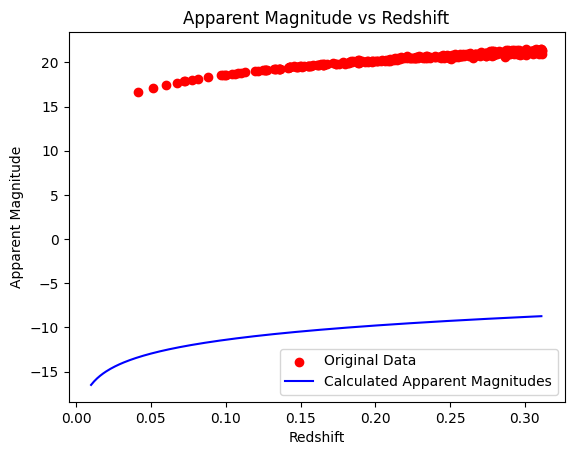

In [ ]:
# Plotting the original data
plt.scatter(redshift, apparent_magnitude, color='red', label='Original Data')

# Plotting the calculated apparent magnitudes as a line
plt.plot(z_range, apparent_magnitudes, color='blue', label='Calculated Apparent Magnitudes')

# Labels and title
plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.title('Apparent Magnitude vs Redshift')
plt.legend()

# Show plot
plt.show()

**Finally, to obtain the best-fit estimates, including uncertainties, for Ω_M,0, Ω_D,0 and H0 by fitting their apparent magnitude and redshift data**

In [ ]:
from scipy.optimize import curve_fit

# Define a function to fit the data
def fit_function(z, Omega_M, Omega_Lambda, H0):
    cosmo_fit = FlatLambdaCDM(H0=H0, Om0=Omega_M)
    d_L_fit = cosmo_fit.luminosity_distance(z).value
    apparent_mag_fit = M - 5 + 5 * np.log10(d_L_fit)
    return apparent_mag_fit

# Perform curve fitting: with p: an array containing the optimal values for the parameters
p, _ = curve_fit(fit_function, z_range, apparent_magnitudes, p0=[0.3, 0.6, 70])

# Extract the best-fit parameters
best_Omega_M, best_Omega_Lambda, best_H0 = p

# Print the best-fit parameters
print(f"Best estimate for Omega_M,0: {best_Omega_M:.4f}")
print(f"Best estimate for Omega_Lambda,0: {best_Omega_Lambda:.4f}")
print(f"Best estimate for H0: {best_H0:.2f}")

Best estimate for Omega_M,0: 0.5000
Best estimate for Omega_Lambda,0: 0.6000
Best estimate for H0: 76.17


**Lastly, lets repeat the last two steps using the best-fit cosmological parameters and reproduce the same plot as the first cell**

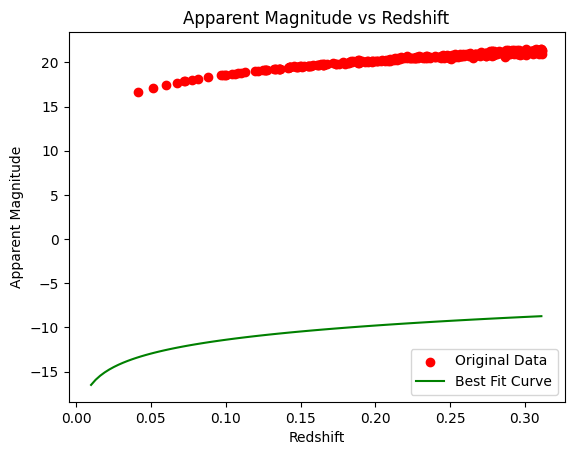

In [ ]:
# Plotting the original data
plt.scatter(redshift, apparent_magnitude, color='red', label='Original Data')

# Plotting the best-fit curve
plt.plot(z_fit, apparent_mag_fit, color='green', label='Best Fit Curve')

# Labels and title
plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.title('Apparent Magnitude vs Redshift')
plt.legend()

# Show plot
plt.show()